In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
%matplotlib inline

In [264]:
# Dataset URL: https://www.kaggle.com/pavlofesenko/titanic-extended
train = pd.read_csv('/kaggle/input/titanic-extended/train.csv')
test = pd.read_csv('/kaggle/input/titanic-extended/test.csv')
pids = test['PassengerId']

In [265]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [266]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


<AxesSubplot:>

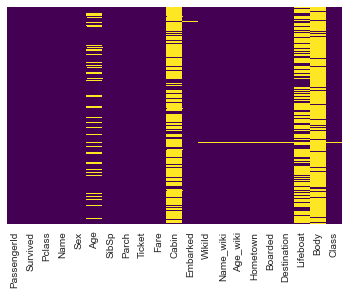

In [267]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

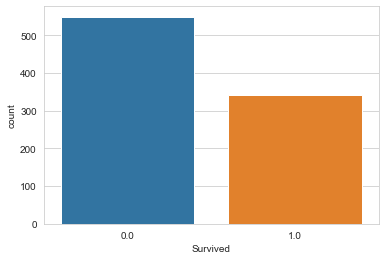

In [268]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

In [269]:
train_size, test_size = train.shape[0], test.shape[0]
x, y = train.drop('Survived', axis=1), train['Survived']

x_total = pd.concat([x, test])

In [270]:
x_total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Studying & Handling missing values 

In [271]:
x_total.isnull().sum() / x_total.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
WikiId         0.003820
Name_wiki      0.003820
Age_wiki       0.005348
Hometown       0.003820
Boarded        0.003820
Destination    0.003820
Lifeboat       0.616501
Body           0.900688
Class          0.003820
dtype: float64

Body attribute represents the build type of the recovery vehicle that extracted the dead bodies.
So this directly imputes the death of a person

In [272]:
x_total['Body'].unique()

array([nan, '175MB', '322M', '38MB', '234MB', '181MB', '309M', '140MB',
       '240{?}MB', '283MB', '169MB', '285MB', '98MB', '207MB', '328MM',
       '171MB', '43MB', '51MB', '7MB', '101MB', '15MB', '174MB', '201MB',
       '255MB', '245MB', '75MB', '18MB', '143MB', '305MB', '108MB',
       '230MB', '110MB', '188MB', '306MB', '166MB', '147MB', '236MB',
       '295MB', '72MB', '314', '232MB', '4MB[84]', '156MB', '103MB',
       '165MB', '249MB', '275MB', '271MB', '332O', '258MB', '22MB',
       '312M', '173MB', '68MB', '62MB', '263MB', '287MB', '206MB', '47MB',
       '17MB', '197MB', '55MB', '69MB', '46MB', '122MB', '256MB', '97MB',
       '284MB', '89MB', '130MB', '19MB', '37MB', '149MB', '14MB', '172MB',
       '269MB', '176MB', '61MB', '52MB', '126MB', '79MB', '[66][67]',
       '50MB', '8MB', '259MB', '196MB', '155MB', '12MB', '70MB', '131MB',
       '80MB', '119MB', '9MB', '121MB', '58MB', '209MB', '189MB', '45MB',
       '96MB', '148MB', '293MB', '294MB', '299MB', '331O', '304MB

In [273]:
# x_total['Body'].fillna('No', inplace=True)
# x_total['Body'] = x_total['Body'].apply(lambda x: int(re.findall(r'[0-9]+', x)[0]) if re.findall(r'[0-9]+', x) else 0)
x_total['Body'] = np.where(x_total['Body'].isnull(), 0, 1)

In [274]:
x_total['Body'].unique()

array([0, 1])

Life boat shows the vessel they were rescued from -> directly shows the survived people

In [275]:
x_total['Lifeboat'].unique()

array([nan, '4', '14?', 'D', '15', '?', '13', '8', '14', 'C', '7', '6',
       '3', '16', '12', '10', '11', 'B', '5', 'A', '9', '2', '1', 'A[64]',
       '15?'], dtype=object)

In [276]:
# x_total['Lifeboat'].fillna('0', inplace=True)
# x_total['Lifeboat'] = x_total['Lifeboat'].apply(lambda x: int(x.replace('?', '')) if x.replace('?', '').isdigit() else 1)
x_total['Lifeboat'] = np.where(x_total['Lifeboat'].isnull(), 0, 1)

In [277]:
x_total['Lifeboat'].unique()

array([0, 1])

Age and Age_wiki

Class and Pclass

shows the same value but based on the missing value ratio, keep one column and remove the other

In [278]:
x_total['Age'] = x_total['Age_wiki']
x_total.drop(['Class', 'Name_wiki', 'Age_wiki', 'WikiId', 'Hometown', 'Boarded', 'Destination'], axis=1, 
             inplace=True)


Impute the missing age & Fare columns with mean of the column

In [279]:
x_total['Age'].fillna(x_total['Age'].mean(), inplace=True)
x_total['Fare'].fillna(x_total['Fare'].mean(), inplace=True)


Embarked is discret variable so fill the missing values with mode

In [280]:
embarked_mode = x_total['Embarked'].mode()[0]
x_total['Embarked'].fillna(embarked_mode, inplace=True)

## Cabin allotment

Convert the cabin to binary -> people with cabin / without cabin

In [281]:
x_total['Cabin'] = np.where(x_total['Cabin'].isnull(), 0, 1)

In [282]:
x_total.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Lifeboat       0
Body           0
dtype: int64

## Title of a person


The title of a person might effect their survival rate as some titles were given priority

In [283]:
x_total['Name'] = x_total['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
x_total['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

## Family Size

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

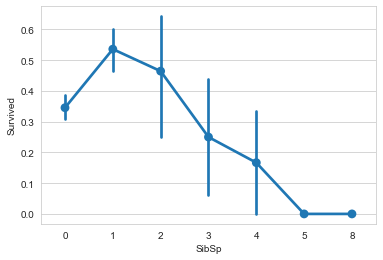

In [284]:
sns.pointplot(data=train, x='SibSp', y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

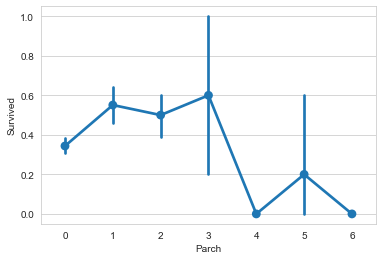

In [285]:
sns.pointplot(data=train, x='Parch', y='Survived')

Point Plot: This method is used to show point estimates and confidence intervals using scatter plot glyphs. A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars

In [286]:
x_total['Fam'] = x_total['SibSp'] + x_total['Parch']
x_total.drop(['SibSp', 'Parch'], axis=1, inplace=True)

## Embarked

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

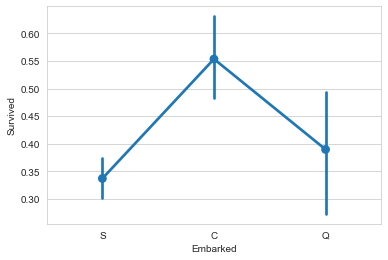

In [287]:
sns.pointplot(data=train, x='Embarked', y='Survived')

In [288]:
x_total['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [289]:
x_total.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Lifeboat       0
Body           0
Fam            0
dtype: int64

In [290]:
x_total.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Lifeboat,Body,Fam
0,1,3,Mr,male,22.0,A/5 21171,7.2500,0,S,0,0,1
1,2,1,Mrs,female,35.0,PC 17599,71.2833,1,C,1,0,1
2,3,3,Miss,female,26.0,STON/O2. 3101282,7.9250,0,S,1,0,0
3,4,1,Mrs,female,35.0,113803,53.1000,1,S,1,0,1
4,5,3,Mr,male,35.0,373450,8.0500,0,S,0,0,0


In [291]:
# Drop the unique value that doen't contribute to prediction
x_total.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [292]:
x_total.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Lifeboat,Body,Fam
0,3,Mr,male,22.0,7.2500,0,S,0,0,1
1,1,Mrs,female,35.0,71.2833,1,C,1,0,1
2,3,Miss,female,26.0,7.9250,0,S,1,0,0
3,1,Mrs,female,35.0,53.1000,1,S,1,0,1
4,3,Mr,male,35.0,8.0500,0,S,0,0,0


## Convert the categorical columns to integers

In [293]:
sex = pd.get_dummies(x_total['Sex'], drop_first=True)
embark = pd.get_dummies(x_total['Embarked'], drop_first=True)
name = pd.get_dummies(x_total['Name'], drop_first=True)

In [294]:
x_total = pd.concat([x_total, sex, embark, name], axis=1)

In [295]:
from sklearn.preprocessing import minmax_scale

x_total[['Age', 'Fare']] = minmax_scale(x_total[['Age', 'Fare']])
x_total.drop(['Sex', 'Embarked', 'Name'], axis=1, inplace=True)

In [296]:
x_total.head()

,Pclass,Age,Fare,Cabin,Lifeboat,Body,Fam,male,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,3,0.295679,0.014151,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0.471759,0.139136,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,0.349858,0.015469,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0.471759,0.103644,1,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3,0.471759,0.015713,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [297]:
x, test = x_total.iloc[:train_size, :], x_total.iloc[train_size:, :]

# Model building

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y, test_size=0.3,
                                                    random_state=101
                                                   )

In [300]:
from sklearn.linear_model import LogisticRegression

In [301]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [302]:
predictions = logmodel.predict(x_test)

In [303]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[152,   2],
       [  1, 113]])

In [304]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9888059701492538

In [310]:
logmodel = LogisticRegression()
logmodel.fit(x, y)
predictions = logmodel.predict(test)
pd.DataFrame({'PassengerId': pids, 'Survived': map(int, predictions)}).to_csv("titanic_output_logistic_regression.csv", index=False)

Which gave me 0.98803 on submission and which is top 1% of all the submissions

# XGBoost

Lets try with xgboost

In [305]:
import xgboost

In [306]:
classifier=xgboost.XGBClassifier()

In [307]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [10, 20, 50, 100, 500, 900]
max_depth = [3, 5, 10, 15, 20, 25]
booster=['gbtree','gblinear']
learning_rate=[0.01,0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score,
    'missing': [1]
    }

In [199]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'accuracy',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [200]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done  98 tasks      | elapsed:    7.4s


[08:05:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   21.5s finished
/Users/sreenivas/opt/miniconda3/envs/ml3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=50, n_jobs=4,
            

In [201]:
random_cv.best_estimator_

XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=4, missing=1, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [202]:
classifier = xgboost.XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=4, missing=1, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
classifier.fit(x_train, y_train)

[08:05:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=4, missing=1, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [205]:
predictions = classifier.predict(x_test)

/Users/sreenivas/opt/miniconda3/envs/ml3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [206]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[152,   2],
       [  1, 113]])

In [207]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9888059701492538

In [208]:
classifier.fit(x, y)

[08:06:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=4, missing=1, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Which also gave the same accuracy score